
**Model Training** - The purpose of this assignment is to apply your knowledge of machine learning to **two** different datasets. For each dataset, you will train a model to achieve a reasonable performance. You may use trial and error process or search strategies (e.g., Grid search) to fine-tune your model. If you are making any choice or trade-off, document it in your notebook. Documentations should be added as a text cell to your notebook.

**Presentation** - Create a summary of your findings and present it in a format of your choice (short video, short report, a few presentation slides, etc.)

**Reflection** - Finally, add your contribution statement and self assessment to your notebook.


# Your Tasks

## Mental Disorder Dataset

Mental Health is an important issue. It must be taken seriously and treated appropriately. Using historical data collected from people diagnosed with Mania Bipolar Disorder (Bipolar Type-1), Depressive Bipolar Disorder (Bipolar Type-2), Major Depressive Disorder, and Normal Individuals, your task is to build a model that can detect the type of mental disorder. The Normal category refers to the individuals who may have minor mental problems, but they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.

Your model will be used in as a tool that will help psychiatrists in their decision making process.

A collection of 120 Psychology Patients with 17 Essential Symptoms is prepared.
The dataset contains the 17 essential symptoms psychiatrists use to diagnose the described disorders. The behavioral symptoms are considered the levels of patients Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration.


### Install and import dependencies

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
dataframe = pd.read_csv("/Mental-Health.csv")

In [ ]:
dataframe.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


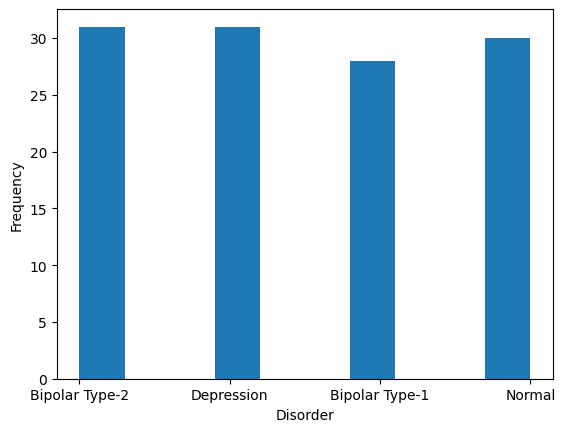

In [ ]:
plt.hist(dataframe["Expert Diagnose"])
plt.xlabel("Disorder")
plt.ylabel("Frequency")

plt.show()

In [ ]:
#### Data Preprocessing: Replacing Categorical Values with Numerical Values
dataframe['Sexual Activity'].replace(['1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10', '7 From 10', '8 From 10', '9 From 10'],[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
dataframe['Optimisim'].replace(['1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10', '7 From 10', '8 From 10', '9 From 10'],[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
dataframe['Concentration'].replace(['1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10', '7 From 10', '8 From 10', '9 From 10'],[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [ ]:
### Data Preprocessing: Separating Target Variable and Features. This is the variable we aim to predict.

target = dataframe["Expert Diagnose"]
data = dataframe.drop("Expert Diagnose", axis = 1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=0)

# Perform undersampling to address the unbalanced dataset
X_under, y_under = sampler.fit_resample(data, target)

# Update data and target with the undersampled data
data = X_under
target = y_under

In [ ]:
target.value_counts()

Bipolar Type-1    28
Bipolar Type-2    28
Depression        28
Normal            28
Name: Expert Diagnose, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

Normal            25
Depression        23
Bipolar Type-1    21
Bipolar Type-2    20
Name: Expert Diagnose, dtype: int64

In [ ]:
y_test.value_counts()

Bipolar Type-2    8
Bipolar Type-1    7
Depression        5
Normal            3
Name: Expert Diagnose, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_attribs = ["Optimisim", "Concentration", "Sexual Activity"]
cat_attribs = ["Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation", "Aggressive Response", "Ignore & Move-On", "Nervous Break-down", "Admit Mistakes", "Overthinking"]

# Numerical pipeline
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

# Categorical pipelineg
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Full pipeline combining numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with n_neighbors=4
# Setting it to 4 means that the model will consider the class labels of the four nearest neighbors
clf_1 = KNeighborsClassifier(n_neighbors=4)

# Train the classifier
clf_1.fit(X_train_prepared, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
clf_1.classes_

array(['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'],
      dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the KNN classifier
clf_1_scores = cross_val_score(clf_1, X_train_prepared, y_train, cv=5)
pd.Series(clf_1_scores).describe()

count    5.000000
mean     0.765359
std      0.105018
min      0.611111
25%      0.722222
50%      0.777778
75%      0.833333
max      0.882353
dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
clf_2 = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_2.fit(X_train_prepared, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
clf_2.classes_

array(['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'],
      dtype=object)

In [ ]:
print(clf_2.feature_importances_)

[0.42887127 0.         0.04938796 0.         0.         0.02252784
 0.         0.         0.         0.03003712 0.05435289 0.
 0.         0.         0.         0.         0.         0.
 0.         0.27715275 0.         0.02252784 0.02027506 0.00600742
 0.         0.01752166 0.         0.         0.01501856 0.
 0.         0.         0.02896437 0.         0.         0.
 0.         0.02735524 0.        ]


In [ ]:
# Perform cross-validation on the Decision Tree classifier
clf_2_scores = cross_val_score(clf_2, X_train_prepared, y_train, cv=5)
pd.Series(clf_2_scores).describe()


count    5.000000
mean     0.775817
std      0.053229
min      0.722222
25%      0.722222
50%      0.777778
75%      0.823529
max      0.833333
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with random_state=42

#forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
clf_3 = RandomForestClassifier(random_state=42)

# Perform cross-validation on the Random Forest classifier
forest_rmses = cross_val_score(clf_3, X_train_prepared, y_train, cv=5)
pd.Series(forest_rmses).describe()

count    5.000000
mean     0.877124
std      0.045318
min      0.833333
25%      0.833333
50%      0.888889
75%      0.888889
max      0.941176
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [4, 6, 8]
     },

    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2,3,4]
     },
]

# Initialize GridSearchCV with the Random Forest classifier (clf_3) to find the best combination of hyperparameters that maximizes the model's performance.
grid_search = GridSearchCV(clf_3, param_grid, cv=3, return_train_score=True)

# Perform grid search on the training data
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [ ]:
# Assign the best estimator from grid search to final_model
final_model = grid_search.best_estimator_

# Extract feature importances from the final model
feature_importances = final_model.feature_importances_
feature_importances.round(2)


array([0.17, 0.02, 0.09, 0.01, 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.03,
       0.  , 0.01, 0.04, 0.  , 0.  , 0.01, 0.01, 0.01, 0.13, 0.15, 0.03,
       0.02, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [ ]:
# Transform the test data using the full pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Make predictions using the final model
y_predictions = final_model.predict(X_test_prepared)


In [ ]:
# Display the predictions
y_predictions

array(['Bipolar Type-2', 'Depression', 'Bipolar Type-2', 'Bipolar Type-2',
       'Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Normal', 'Bipolar Type-2',
       'Depression', 'Normal', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-2', 'Depression', 'Normal', 'Normal',
       'Bipolar Type-2', 'Normal', 'Bipolar Type-2'], dtype=object)

In [ ]:
# Predict class probabilities for the test data
y_predictions_prob = final_model.predict_proba(X_test_prepared)
y_predictions_prob

array([[0.1       , 0.86666667, 0.03333333, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.4       , 0.56666667, 0.03333333, 0.        ],
       [0.33333333, 0.63333333, 0.        , 0.03333333],
       [0.2       , 0.73333333, 0.        , 0.06666667],
       [0.        , 0.03333333, 0.9       , 0.06666667],
       [0.46666667, 0.3       , 0.03333333, 0.2       ],
       [0.2       , 0.56666667, 0.03333333, 0.2       ],
       [0.5       , 0.23333333, 0.03333333, 0.23333333],
       [0.2       , 0.73333333, 0.        , 0.06666667],
       [0.16666667, 0.06666667, 0.06666667, 0.7       ],
       [0.1       , 0.9       , 0.        , 0.        ],
       [0.        , 0.03333333, 0.93333333, 0.03333333],
       [0.06666667, 0.        , 0.06666667, 0.86666667],
       [0.93333333, 0.        , 0.        , 0.06666667],
       [0.8       , 0.2       , 0.        , 0.        ],
       [0.03333333, 0.83333333, 0.03333333, 0.1       ],
       [0.03333333, 0.03333333,

In [ ]:
# Count the number of instances for each class in the test set

print("Bipolar Type-2", str(len(y_test[y_test=="Bipolar Type-2"])))
print("Bipolar Type-1", str(len(y_test[y_test=="Bipolar Type-1"])))
print("Depression", str(len(y_test[y_test=="Depression"])))
print("Normal", str(len(y_test[y_test=="Normal"])))

Bipolar Type-2 8
Bipolar Type-1 7
Depression 5
Normal 3


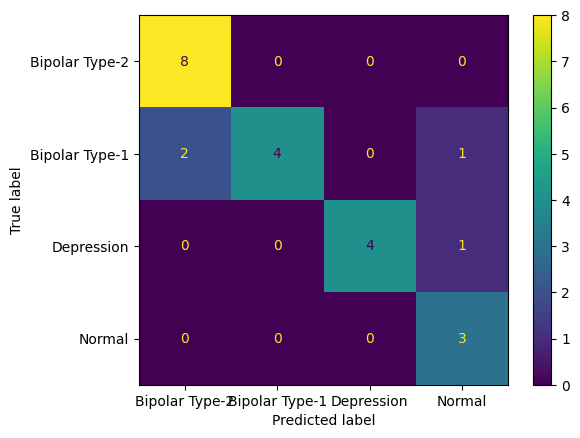

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and plots it
cm = confusion_matrix(y_test, y_predictions, labels=["Bipolar Type-2", "Bipolar Type-1", "Depression", "Normal"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Bipolar Type-2", "Bipolar Type-1", "Depression", "Normal"])
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy_score(y_test, y_predictions)

0.8260869565217391

In [ ]:
from sklearn.metrics import precision_score

# Calculate the precission score
precision_score(y_test, y_predictions, average='weighted')

0.8782608695652173

In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall score
recall_score(y_test, y_predictions, average='weighted')

0.8260869565217391

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Bipolar Type-2", "Bipolar Type-1", "Depression", "Normal"]
print(classification_report(y_test, y_predictions, target_names=target_names))

                precision    recall  f1-score   support

Bipolar Type-2       1.00      0.57      0.73         7
Bipolar Type-1       0.80      1.00      0.89         8
    Depression       1.00      0.80      0.89         5
        Normal       0.60      1.00      0.75         3

      accuracy                           0.83        23
     macro avg       0.85      0.84      0.81        23
  weighted avg       0.88      0.83      0.82        23



In [ ]:
import joblib

joblib.dump(final_model, "Mental_Disorder_CLF_model.pkl")

['Mental_Disorder_CLF_model.pkl']

## Wine Quality dataset

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

The wine quality dataset is larger than the mental health disrder datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.

Train a regression model OR a 3-class classifier (low, medium, high quality). To train a 3-class classifier, you must re-label the data. You may choose the cut-off points for each class.

In [ ]:
white_wine_csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(white_wine_csv, sep=';')

# Inspect the dataset
wine_data.info()
wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Note that the wine quality dataset is **unbalanced**, with many more samples in the "medium" quality categories than at the extremes.

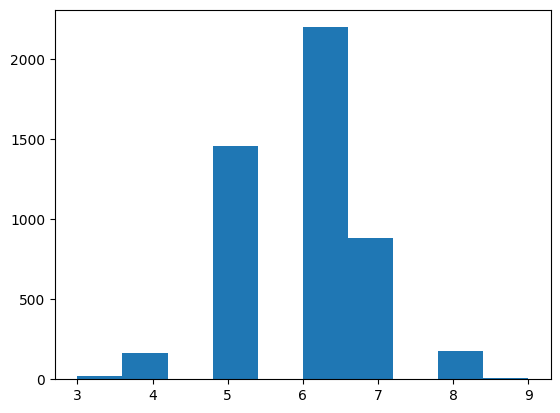

In [ ]:
plt.hist(wine_data['quality'], bins=10)
plt.show()

In [ ]:
#Preprocessing the data

wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
# Data Preprocessing

# Creates a feature called "alcohol_cat" based on the "alcohol" column in wine_data. It bins the alcohol levels into five categories using the pd.cut function, with predefined bins and corresponding labels.

wine_data["alcohol_cat"] = pd.cut(wine_data["alcohol"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
corr_matrix = wine_data.corr()
corr_matrix

<ipython-input-105-a1fef0a00952>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = wine_data.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [ ]:
# features that are most strongly correlated (positively or negatively) with wine quality.
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [ ]:
# Removing Irrelevant features due to correlation.
wine_data1 = wine_data.drop(['sulphates', 'free sulfur dioxide', 'citric acid'], axis=1)
wine_data1.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality,alcohol_cat
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,8.8,6,5
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,9.5,6,5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,10.1,6,5
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6,5
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6,5


In [ ]:
# The dataset is then split into training and testing sets using stratified sampling based on the "alcohol_cat" column. The test set makes up 20% of the total dataset.
from sklearn.model_selection import train_test_split

target = wine_data1['quality']
data = wine_data1.drop('quality', axis=1)

strat_train_set, strat_test_set = train_test_split(wine_data1, test_size=0.2, stratify=wine_data1["quality"], random_state=42)

In [ ]:
# Extract features and target variables from the split sets
X_train = strat_train_set.drop("quality", axis=1)
y_train = strat_train_set["quality"]

X_test = strat_test_set.drop("quality", axis=1)
y_test = strat_test_set["quality"]

# Apply oversampling to the training set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

#Splitting the X_train resampled and the y_train_resampled so we can create a validation split to test the different models and choose the best one
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

In [ ]:
X_train_resampled.value_counts()

fixed acidity  volatile acidity  residual sugar  chlorides  total sulfur dioxide  density  pH    alcohol  alcohol_cat
9.1            0.27              10.6            0.035      124.0                 0.99700  3.20  10.4     5              367
7.1            0.26              2.2             0.032      113.0                 0.99030  3.37  12.9     5              362
6.6            0.36              1.6             0.021      85.0                  0.98965  3.41  12.4     5              349
7.4            0.24              2.0             0.031      139.0                 0.99055  3.28  12.5     5              322
6.9            0.39              4.6             0.022      19.0                  0.99150  3.31  12.6     5              111
                                                                                                                        ... 
6.6            0.27              5.3             0.137      163.0                 0.99510  3.20  9.3      5                1
       

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Data pipeline to correct all the data to numerical
num_attribs1 = ["fixed acidity", "volatile acidity", "residual sugar", "chlorides",
               "total sulfur dioxide", "density", "pH", "alcohol"]

num_pipeline1 = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

full_pipeline1 = ColumnTransformer([
    ("num", num_pipeline1, num_attribs1),
])

X_prepared = full_pipeline1.fit_transform(X_train_resampled)

In [ ]:
# Making sure that the X_val_resampled is the same shape as X_prepared so it works with the model
X_val_prepared = full_pipeline1.transform(X_val_resampled)

This step runs the validation data through a series of models to test, which would be most suitable for our dataset. There are a total of 16 models that we are testing through, so it may take some time for this to complete

***WARNING***<BR>
This step will take a couple minutes to complete all of the calculations.

In [ ]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}

# List of models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    BayesianRidge(),
    GradientBoostingRegressor(random_state=42),
    KNeighborsRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    HuberRegressor(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    SVR()
]

# Evaluate all models using a loop
for model in models:
    print(f"\nEvaluating {model.__class__.__name__}:\n")

    # Fit the model
    model.fit(X_prepared, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_val_prepared)

    # Calculate metrics
    mse = mean_squared_error(y_val_resampled, y_pred)
    mae = mean_absolute_error(y_val_resampled, y_pred)
    r2 = r2_score(y_val_resampled, y_pred)

    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_val_prepared, y_val_resampled, scoring="neg_root_mean_squared_error", cv=10)
    mean_cv_score = np.mean(cv_scores)

    # Store results in the dictionary
    results[model.__class__.__name__] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'CV_RMSE': mean_cv_score}

    # Print results for the current model
    for metric, value in results[model.__class__.__name__].items():
        print(f"{metric}: {value}")


Evaluating LinearRegression:

MSE: 2.540967032243233
MAE: 1.2663558112673021
R2: 0.36637579395556474
CV_RMSE: 1.5981061617612615

Evaluating DecisionTreeRegressor:

MSE: 0.1437855402112104
MAE: 0.10641754670999187
R2: 0.9641451472605028
CV_RMSE: 0.7226967257064041

Evaluating RandomForestRegressor:

MSE: 0.08303830219333874
MAE: 0.12100324939073923
R2: 0.9792932857329982
CV_RMSE: 0.5083447954416547

Evaluating BayesianRidge:

MSE: 2.5398182258028066
MAE: 1.2667608175232783
R2: 0.366662264247968
CV_RMSE: 1.5973888790407642

Evaluating GradientBoostingRegressor:

MSE: 0.6005581944546958
MAE: 0.5829551816169303
R2: 0.8502427602105109
CV_RMSE: 0.8077720481103368

Evaluating KNeighborsRegressor:

MSE: 0.2056214459788789
MAE: 0.21007311129163284
R2: 0.9487255348846241
CV_RMSE: 0.7892677227571993

Evaluating Ridge:

MSE: 2.5407907018044433
MAE: 1.2664145608001005
R2: 0.36641976431521983
CV_RMSE: 1.5979569176167048

Evaluating Lasso:

MSE: 3.9653181818345495
MAE: 1.704434014341816
R2: 0.01119

In [ ]:
#From looking at the model choosing process, it looks like RandomForestRegressor had the best performance on the data, so we will be moving forward with it
ran_for = RandomForestRegressor(random_state=42)
ran_for.fit(X_prepared, y_train_resampled)

RandomForestRegressor(random_state=42)

In [ ]:
#Fine Tuning the model with grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [4, 6, 8]
     },

    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2,3,4]
     },
]

grid_search = GridSearchCV(ran_for, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_prepared, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
#Creating the model with the best parameters
final_model = grid_search.best_estimator_

feature_importances = final_model.feature_importances_
feature_importances.round(2)


array([0.1 , 0.09, 0.07, 0.15, 0.13, 0.2 , 0.07, 0.2 ])

In [ ]:
#Final testing and rmse calculations
X_test_prepared = full_pipeline1.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.6729996815961887


In [ ]:
final_predictions

array([5.6, 5.8, 6. , 6.2, 6.1, 5.7, 5.9, 5.7, 5.8, 4.8, 7. , 5.8, 4.9,
       6.7, 5. , 4. , 5.8, 6.8, 6.2, 6. , 5.6, 6.7, 5.7, 6. , 6. , 5.2,
       6. , 6. , 6.3, 6. , 6.1, 5.8, 6.5, 6.1, 6.5, 4.9, 6. , 6.3, 5.4,
       5.3, 6.1, 4.8, 7. , 5.9, 5. , 5.8, 6. , 6. , 5.8, 6.1, 6. , 5.6,
       5.9, 5.9, 6.1, 6.4, 5.5, 5.1, 5.2, 5.6, 6.3, 6.2, 5.7, 5.4, 5.8,
       5.4, 5. , 5.5, 5.4, 5. , 6.9, 6. , 5.9, 6. , 6.1, 4.8, 6. , 6.3,
       6. , 6.4, 4.3, 5.4, 7. , 5. , 5. , 7. , 5.4, 7. , 5.2, 6.8, 7.2,
       5.3, 5. , 6.2, 5. , 6. , 5.4, 6.1, 6.1, 5.5, 5.5, 6. , 5.7, 4. ,
       4. , 6. , 6.4, 6.4, 6.2, 6. , 6.1, 5. , 5. , 4.9, 5.6, 8. , 5.7,
       7.1, 6. , 6.2, 5.3, 6. , 5. , 5.5, 5.8, 5.5, 5.4, 7. , 6.7, 4.9,
       5. , 5.6, 5.7, 5.8, 7. , 8. , 5. , 6.4, 6. , 6.4, 7. , 5.7, 4.8,
       5.7, 6. , 5.5, 6. , 6.3, 8. , 6.6, 6.6, 5.7, 5. , 5.1, 6.3, 5.6,
       5. , 7. , 5. , 5.3, 6.2, 7. , 5.1, 7. , 5.5, 5. , 7. , 6. , 7.1,
       5. , 5.1, 5.8, 5.8, 6.2, 6.1, 6.4, 6. , 6.5, 5.1, 7.2, 5.

In [ ]:
import joblib

joblib.dump(final_model, "my_wine_quality_model.pkl")

## Reflection

**Contribution statement**: Briefly explain the contribution of each member to the assignment.



**Koddy**: I worked mainly on dataset 2 (Wine Quality), specifically oversampling the data and splitting it properly into test/train/validation sets, and testing and evaluating the different models.
<br>
**Alishan**: I worked on dataset 1 (Mental Health), which included preprocessing the data, evaluating different models, and final findings within the dataset.
<br>
**Aldo**: I completed the in text documentation of Task One and Two. Also helped split data for Task 2 completed the report for Task 2.
<br>
**Paraspreet**: I worked on the report for Task 1 and Task 2, while checking over the evaluation and choice of models for both tasks
<br>

**Self assessment**: In your opinion, what are the deficiencies in your work that need to be improved?

- In my opinion, the decision tree model should also be looked at to see if it had better performance on the data when it was actually trained in comparison to the RandomForestRegressor model that we ultimately went with, since the model also had similar scores in the evaluation testing.
- Look into different ways to resample the dataset when it is imbalanced to try to cause less issues like overfitting.

# Marking Rubric



The following table provides a summary of how your assignment will be marked. Your results will not be ranked against each other; what counts is reasonable choices and description of your thought processes.

<table>
<tr>
<th>Item</th>
<th>Points</th>
</tr>

<tr>
<td>The training process for dataset 1</td>
<td>20</td>
</tr>

<tr>
<td>The training process for dataset 2</td>
<td>24</td>
</tr>

<tr>
<td>Documentation of the process and choices made </td>
<td>20</td>
</tr>

<tr>
<td>Overall code quality</td>
<td>10</td>
</tr>

<tr>
<td>Presentation</td>
<td>16</td>
</tr>

<tr>
<td>Reflection</td>
<td>10</td>
</tr>


<tr>
<td><b>Total:</b></td>
<td><b>100</b></td>
</tr>

</table>